<a href="https://colab.research.google.com/github/digantkumar/Digant-Kumar/blob/master/Task2-Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 2 - DENOISING**

## **AUTOENCODER BASE MODEL (GIVEN)**

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

input_img = tf.keras.layers.Input(shape=(784)) # adapt this if using `channels_first` image data format
intermediate_dim = 128
original_dim = 784

# Encoder
hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim,activation = tf.nn.relu)(input_img)
encoded = tf.keras.layers.Dense(units = intermediate_dim, activation = tf.nn.relu)(hidden_layer_1)

# Decoder
hid_layer_1 = tf.keras.layers.Dense(units=intermediate_dim, activation = tf.nn.relu)(encoded)
decoded = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)(hid_layer_1)

autoencoder = tf.keras.models.Model(input_img, decoded)
optimizer = tf.keras.optimizers.Adam(lr=0.001)
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
autoencoder.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_94 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_95 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_96 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_97 (Dense)             (None, 784)               101136    
Total params: 234,640
Trainable params: 234,640
Non-trainable params: 0
_________________________________________________________________


In [0]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [44]:
# This will train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0580 - val_loss: 0.0470
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0449 - val_loss: 0.0429
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0418 - val_loss: 0.0408
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0400 - val_loss: 0.0399
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0388 - val_loss: 0.0384
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0378 - val_loss: 0.0377
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0372 - val_loss: 0.0370
Epoch 8/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0366 - val_loss: 0.0368
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0362 - val_loss: 0.0363
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0358 - val_lo

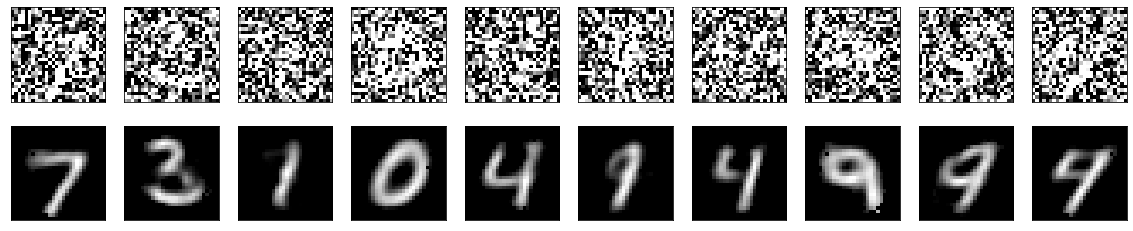

In [45]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **AUTOENCODER BASE MODEL + 2 HIDDEN LAYERS**

In [46]:
input_img = tf.keras.layers.Input(shape=(784)) # adapt this if using `channels_first` image data format
intermediate_dim = 128
original_dim = 784

# Encoder
hidden_layer_1 = tf.keras.layers.Dense(units=intermediate_dim,activation = tf.nn.relu)(input_img)
hidden_layer_2 = tf.keras.layers.Dense(units=intermediate_dim/2,activation = tf.nn.relu)(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(units=intermediate_dim/4,activation = tf.nn.relu)(hidden_layer_2)
encoded = tf.keras.layers.Dense(units = intermediate_dim/4, activation = tf.nn.relu)(hidden_layer_3)

# Decoder
hid_layer_1 = tf.keras.layers.Dense(units=intermediate_dim/2, activation = tf.nn.relu)(encoded)
hid_layer_2 = tf.keras.layers.Dense(units=intermediate_dim, activation = tf.nn.relu)(hid_layer_1)
decoded = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)(hid_layer_2)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_99 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_100 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_101 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_102 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_103 (Dense)            (None, 128)               832

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [48]:
# This will train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0652 - val_loss: 0.0560
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0523 - val_loss: 0.0489
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0473 - val_loss: 0.0458
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0446 - val_loss: 0.0438
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0433 - val_loss: 0.0431
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0422 - val_loss: 0.0415
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0410 - val_loss: 0.0409
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0398 - val_loss: 0.0396
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0394 - val_lo

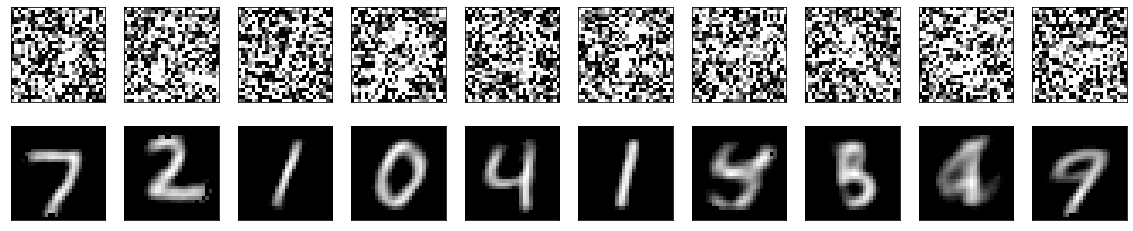

In [49]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **CNN BASIC MODEL**

In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [46]:
# This will train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.7032 - val_loss: 0.7010
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6990 - val_loss: 0.6970
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6952 - val_loss: 0.6935
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6919 - val_loss: 0.6903
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6886 - val_loss: 0.6869
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6849 - val_loss: 0.6827
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6796 - val_loss: 0.6761
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6702 - val_loss: 0.6628
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6483 - val_loss: 0.6280
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5818 - val_lo

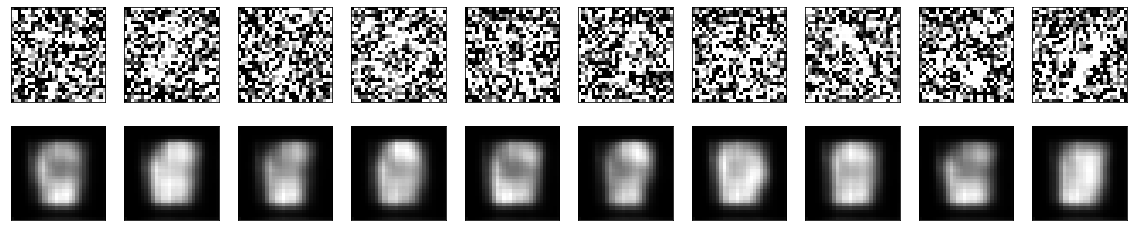

In [47]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## **CNN MODEL VARIATIONS**

In [0]:
#################################################################################################
#########                      CNN BASE MODEL Variations                                 ########
#################################################################################################


input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(32, (5, 5), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [51]:
# This will train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6912 - val_loss: 0.6890
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6852 - val_loss: 0.6797
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.6635 - val_loss: 0.6325
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.5321 - val_loss: 0.4772
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4560 - val_loss: 0.4404
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.4074 - val_loss: 0.3730
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3354 - val_loss: 0.3117
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.3010 - val_loss: 0.2946
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2912 - val_loss: 0.2885
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.2871 - val_lo

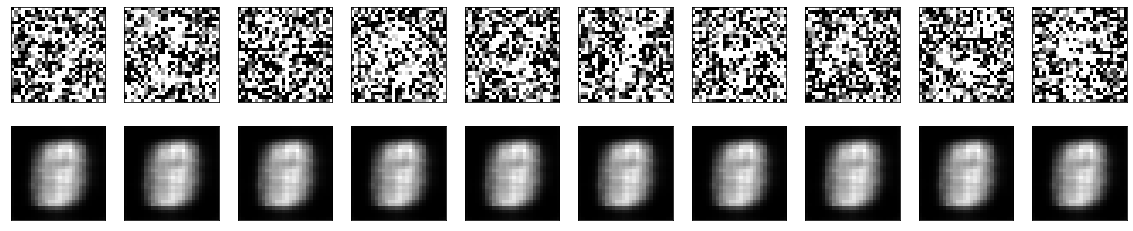

In [52]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **CNN MODEL OPTIMIZED**

In [0]:

#################################################################################################
#########                        CNN MODEL OPTIMIZED                                     ########
#################################################################################################

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
optimizer = tf.keras.optimizers.Adam(lr=0.001)
autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [59]:
# This will train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.2356 - val_loss: 0.2013
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1882 - val_loss: 0.1832
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1791 - val_loss: 0.1792
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1752 - val_loss: 0.1780
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1725 - val_loss: 0.1712
Epoch 6/100
469/469 [==============================] - 4s 10ms/step - loss: 0.1703 - val_loss: 0.1703
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1688 - val_loss: 0.1706
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1676 - val_loss: 0.1663
Epoch 9/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1666 - val_loss: 0.1663
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1658 - val

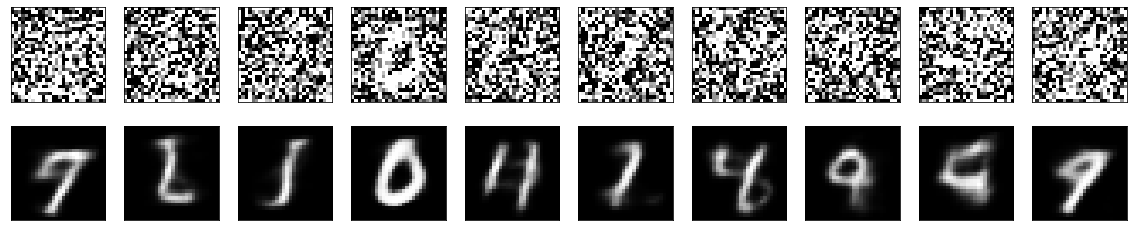

In [61]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()